#             Credit Card Fraud Detection

Fraud detection is a set of activities that are taken to prevent money or property from being obtained through false pretenses.

Fraud can be committed in different ways and different settings. For example, fraud can be committed in banking, insurance, government and healthcare sectors

In [1]:
#importing packages

import pandas as pd     #data processing
import numpy as np      #working with arrays
import matplotlib.pyplot as plt    #visualisation
import seaborn as sns
import sklearn
from termcolor import colored,cprint as cl  #text customization


In [2]:
#importing dataset (row=284807, column=31)
#(The dataset is imbalanced towards a feature: majority of transactions belongs to our datasets are normal and only a few percentages of transactions are fraudulent.)

df=pd.read_csv("creditcard.csv")

#Displaying first five row
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#Shape of dataset

df.shape

(284807, 31)

In [4]:
#type of columns
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [5]:
#Checking null value
df.isnull().values.any()

False

In [6]:
#number of transaction which are fraudulent and which are not (492 transaction which are fraudulent and 284315 transction which are legimate)
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

c:\users\sohaib mallick\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

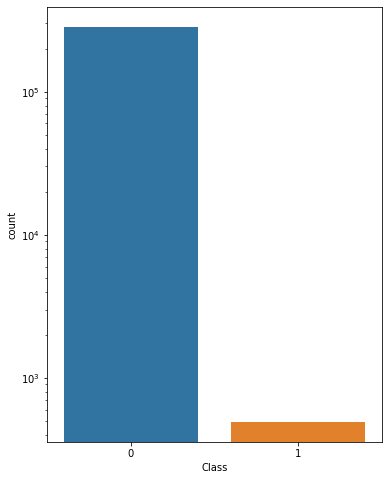

In [7]:
#countplot of classes
plt.figure(figsize=(6,8))
sns.countplot(df['Class'],log=True)

In [8]:
fraudulent=df[df.Class==1]
legimate=df[df.Class==0]

fraudulent.shape

(492, 31)

In [9]:
legimate.shape

(284315, 31)

In [10]:
#Amount used in different transaction class
fraudulent.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [11]:
legimate.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

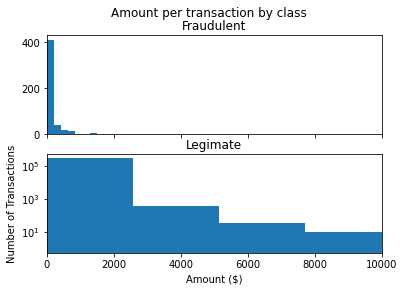

In [12]:
#graphical(histogram) representation of amount per transaction by class
fig,(ax1,ax2)=plt.subplots(2,1,sharex=True)
fig.suptitle("Amount per transaction by class")

bins=50

ax1.hist(fraudulent.Amount)
ax1.set_title("Fraudulent")

ax2.hist(legimate.Amount)
ax2.set_title("Legimate")

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0,10000))
plt.yscale('log')
plt.show()

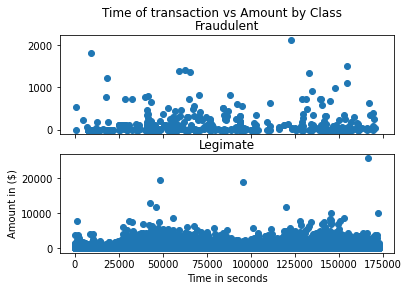

In [13]:
#checking fraudulent transaction occur more often certain time
fig,(ax1,ax2)=plt.subplots(2,1,sharex=True)
fig.suptitle("Time of transaction vs Amount by Class")

ax1.scatter(fraudulent.Time,fraudulent.Amount)
ax1.set_title('Fraudulent')

ax2.scatter(legimate.Time,legimate.Amount)
ax2.set_title('Legimate')



plt.xlabel('Time in seconds')
plt.ylabel('Amount in ($)')

plt.show()

In [14]:
#In the above subplot , it doesn't seems like the time of transaction really matter
#drop time column
df.drop('Time',axis=1,inplace=True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<AxesSubplot:title={'center':'Correlation Matrix'}>

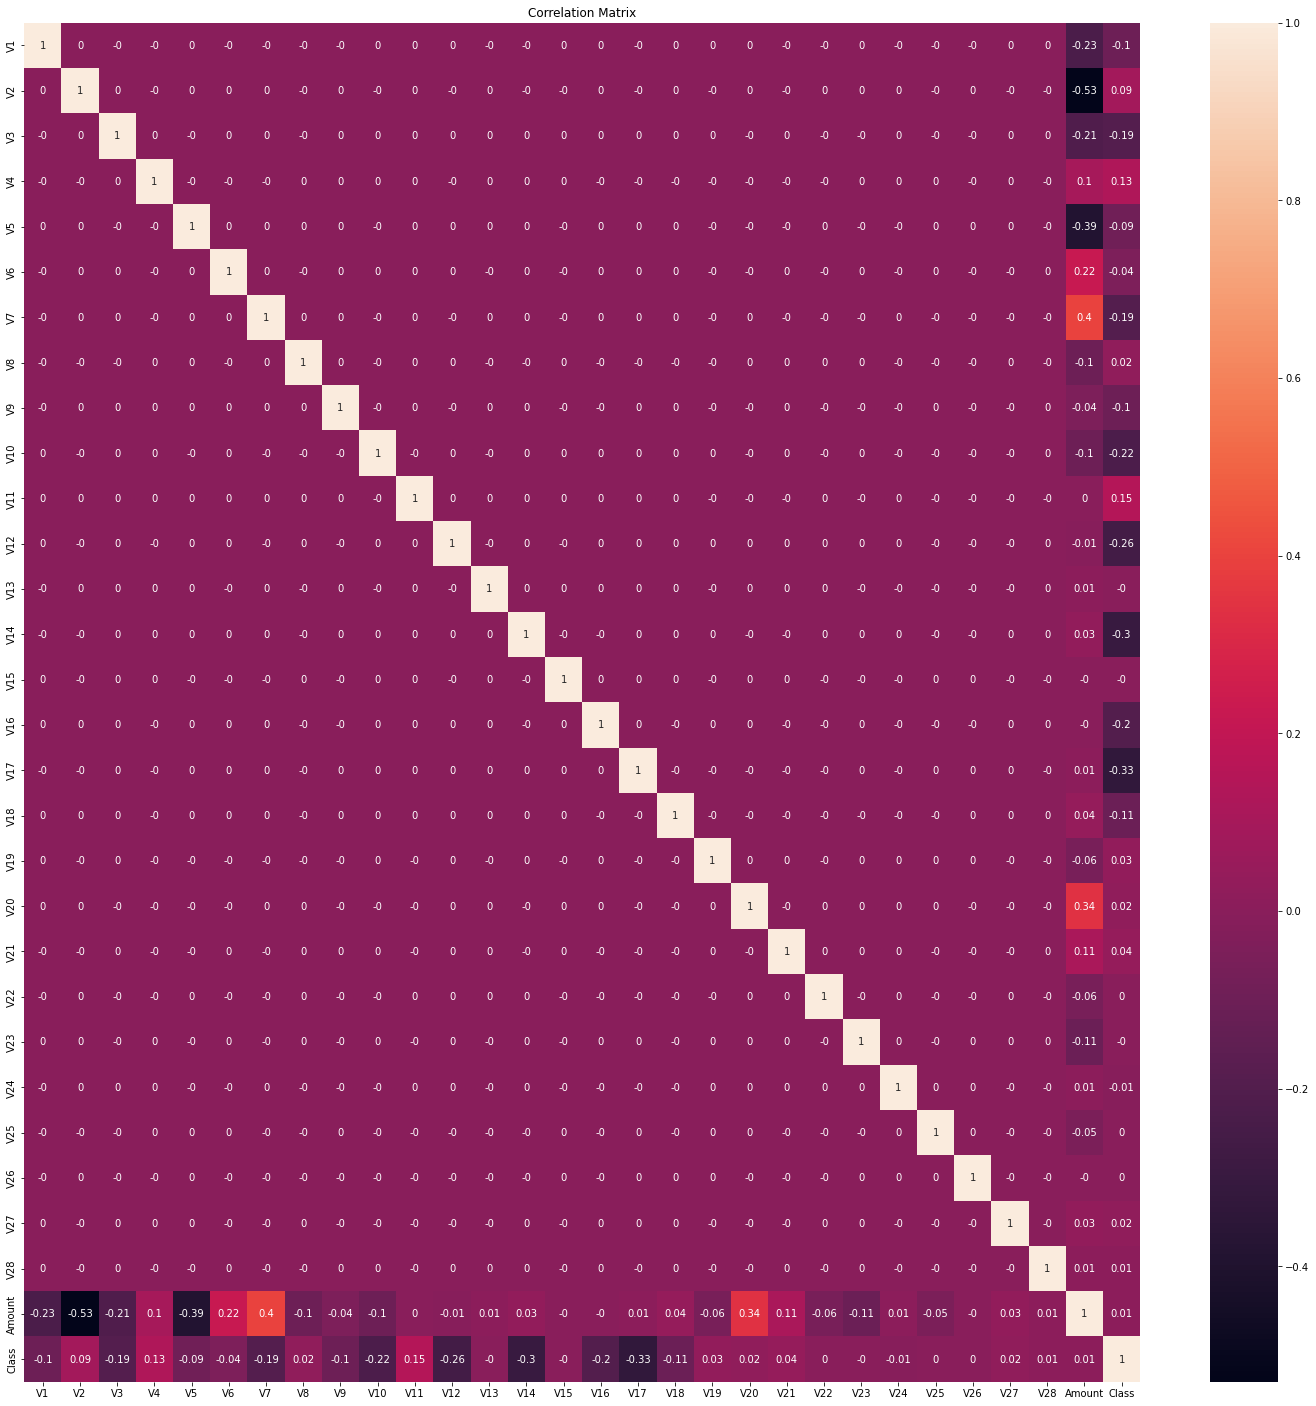

In [15]:
#potting a correlation heatmap
plt.figure(figsize=(25,25))
plt.title("Correlation Matrix")
sns.heatmap(round(df.corr(),2),annot=True)

In [16]:
#checking correlation of dependent variable with each independent variable
df.corr()[['Class']].sort_values(by='Class')[:-1]

,Class
V17,-0.326481
V14,-0.302544
V12,-0.260593
V10,-0.216883
V16,-0.196539
V3,-0.192961
V7,-0.187257
V18,-0.111485
V1,-0.101347
V9,-0.097733


In [17]:
#dropping dublicates value
df.drop_duplicates(inplace=True)
df.shape

(275663, 30)

In [18]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Feature Selection & Data Split

In [19]:
#independent(x) and depedent(y) variale
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [20]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [21]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [22]:
#train & test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

print(cl('X_train sample : ', attrs=['bold']),X_train[:1])
print(cl('X_test sample : ', attrs=['bold']),X_test[:1])
print(cl('y_train sample : ', attrs=['bold']),y_train[:20])
print(cl('y_test sample : ', attrs=['bold']),y_test[:1])


X_train sample : 
None               V1        V2        V3        V4        V5        V6        V7  \
158075  1.902752  0.641231 -0.347896  4.138767  0.417808  0.017635  0.095476   

              V8        V9       V10  ...       V20       V21       V22  \
158075 -0.220832  0.506835  0.973773  ... -0.297437 -0.057126  0.318512   

             V23       V24       V25       V26       V27       V28  Amount  
158075  0.088098 -0.052138  0.125921  0.058417 -0.044072 -0.055317    7.87  

[1 rows x 29 columns]
X_test sample : 
None               V1        V2        V3        V4        V5        V6        V7  \
188975 -2.999973  0.469785 -1.830787 -1.043059  2.041088 -1.419339 -0.405755   

              V8        V9       V10  ...       V20      V21       V22  \
188975 -3.117209 -0.504147 -1.069971  ... -1.653524  3.02624 -0.774693   

             V23       V24       V25       V26      V27       V28  Amount  
188975 -1.135155 -0.369208  0.107815  0.608534  0.62793 -0.542429   17.04  

[1 

# Model Building

In [23]:
#Feature Scaling   (all feature on the same scale)
from sklearn.preprocessing import StandardScaler    #data standardization
sc=StandardScaler()

X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(220530, 29)
(55133, 29)


# 1. Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier   #Decision tree algorithm

# Training the Decision Tree Classification model on Training set 
tree_model=DecisionTreeClassifier(max_depth=4,criterion='entropy')
tree_model.fit(X_train,y_train)
tree_yhat=tree_model.predict(X_test)

In [25]:
#checking accuracy of decision tree model (Accuracy score = No.of correct predictions / Total no.of predictions)
from sklearn.metrics import accuracy_score

#print accuracy score
cl(f"Accuracy score of decision tree model: {accuracy_score(y_test,tree_yhat)}",attrs=['bold'])

Accuracy score of decision tree model: 0.9993651714943863


In [26]:
#checking F1 score of decision tree model (F1 score = 2( (precision * recall) / (precision + recall) ))
from sklearn.metrics import f1_score

#print f1 score of decision tree model
cl(f"F1 score of decision tree model {f1_score(y_test,tree_yhat)}",attrs=['bold'])

F1 score of decision tree model 0.7976878612716763


In [27]:
#checking confusion matrix of decision tree model
from sklearn.metrics import confusion_matrix

cl(f"confusion matrix of decision tree model: {(confusion_matrix(y_test,tree_yhat))}",attrs=['bold'])

confusion matrix of decision tree model: [[55029     8]
 [   27    69]]


# 2. K-Nearest Neighbors

In [28]:
from sklearn.neighbors import KNeighborsClassifier

#Training the K-Nearest Neighbors classifier on training set
n=7
knn=KNeighborsClassifier(n_neighbors=n)
knn.fit(X_train,y_train)
knn_yhat=knn.predict(X_test)

# 3. Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

#Training the Logistic Regression classifier on training set
lr=LogisticRegression()
lr.fit(X_train,y_train)
lr_yhat=lr.predict(X_test)

# 4. Support Vector Machines

In [30]:
from sklearn.svm import SVC

#Training the support vector classifier on training set
svm=SVC()
svm.fit(X_train,y_train)
svm_yhat=svm.predict(X_test)

# 5. Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

#Training the random forest classifier on training set
rf=RandomForestClassifier(max_depth=4)
rf.fit(X_train,y_train)
rf_yhat=rf.predict(X_test)

# 6. XGBoost

In [32]:
from xgboost import XGBClassifier

#Training the XGBoost classifier on training set
xgb=XGBClassifier(max_depth=4)
xgb.fit(X_train,y_train)
xgb_yhat=xgb.predict(X_test)

## Accuracy Score

In [33]:
from sklearn.metrics import accuracy_score

(cl("Accuracy Score",attrs=['bold']))
(cl('------------------------------------------------------------------------', attrs = ['bold']))
(cl(f"Accuracy score of decision tree model: {accuracy_score(y_test,tree_yhat)}",attrs=['bold']))
(cl(f"Accuracy score of KNN model: {accuracy_score(y_test,knn_yhat)}",attrs=['bold'],color='green'))
(cl(f"Accuracy score of Logistic Regression model: {accuracy_score(y_test,lr_yhat)}",attrs=['bold'],color='red'))
(cl(f"Accuracy score of Support Vector Machines model: {accuracy_score(y_test,svm_yhat)}",attrs=['bold'],color='blue'))
(cl(f"Accuracy score of Random Forest model: {accuracy_score(y_test,rf_yhat)}",attrs=['bold'],color='yellow'))
(cl(f"Accuracy score of XGBoost model: {accuracy_score(y_test,xgb_yhat)}",attrs=['bold'],color='magenta'))

Accuracy Score
------------------------------------------------------------------------
Accuracy score of decision tree model: 0.9993651714943863
Accuracy score of KNN model: 0.9994014474089928
Accuracy score of Logistic Regression model: 0.9991475160067473
Accuracy score of Support Vector Machines model: 0.9992926196651734
Accuracy score of Random Forest model: 0.9993651714943863
Accuracy score of XGBoost model: 0.999419585366296


## F1 Score

In [34]:
from sklearn.metrics import f1_score
(cl('F1 Score',attrs=['bold']))
(cl('------------------------------------------------------------------------', attrs = ['bold']))
(cl(f"F1 Score of Decision Tree model: {f1_score(y_test,tree_yhat)}",attrs=['bold']))
(cl(f"F1 score of KNN model: {f1_score(y_test,knn_yhat)}",attrs=['bold'],color='green'))
(cl(f"F1 score of Logistic Regression model: {f1_score(y_test,lr_yhat)}",attrs=['bold'],color='red'))
(cl(f"F1 score of Support Vector Machines model: {f1_score(y_test,svm_yhat)}",attrs=['bold'],color='blue'))
(cl(f"F1 score of Random Forest model: {f1_score(y_test,rf_yhat)}",attrs=['bold'],color='yellow'))
(cl(f"F1 score of XGBoost model: {f1_score(y_test,xgb_yhat)}",attrs=['bold'],color='magenta'))

F1 Score
------------------------------------------------------------------------
F1 Score of Decision Tree model: 0.7976878612716763
F1 score of KNN model: 0.8070175438596492
F1 score of Logistic Regression model: 0.7006369426751593
F1 score of Support Vector Machines model: 0.751592356687898
F1 score of Random Forest model: 0.7904191616766466
F1 score of XGBoost model: 0.8160919540229885


## Confusion Matrix

In [35]:
#defining plot function
def plot_confusion_matrix(cm,title):
    sns.heatmap(cm,cmap='RdPu',annot=True,fmt='.0f',xticklabels=['Legimate(0)','Fraudulent(1)'],yticklabels=['Legimate(0)','Fraudulent(1)'])
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    title=f'Confusion Matrix of {title}'
    plt.title(title)

In [36]:
from sklearn.metrics import confusion_matrix
#compute confusion matrix for the models
tree_matrix=confusion_matrix(y_test,tree_yhat,labels=[0,1]) #decision tree
knn_matrix = confusion_matrix(y_test, knn_yhat, labels = [0, 1]) # K-Nearest Neighbors
lr_matrix = confusion_matrix(y_test, lr_yhat, labels = [0, 1]) # Logistic Regression
svm_matrix = confusion_matrix(y_test, svm_yhat, labels = [0, 1]) # Support Vector Machine
rf_matrix = confusion_matrix(y_test, rf_yhat, labels = [0, 1]) # Random Forest Tree
xgb_matrix = confusion_matrix(y_test, xgb_yhat, labels = [0, 1]) # XGBoost

In [37]:
#plot the confusion matrix
plt.rcParams['figure.figsize']=(10,6)

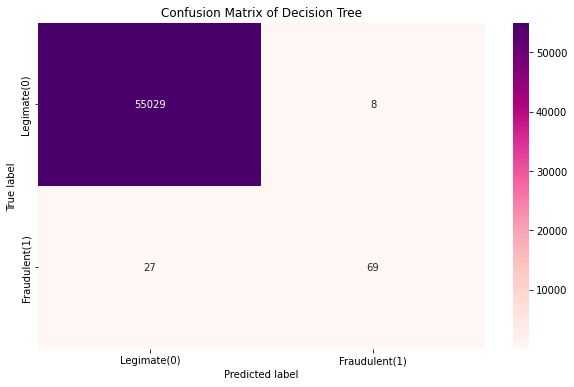

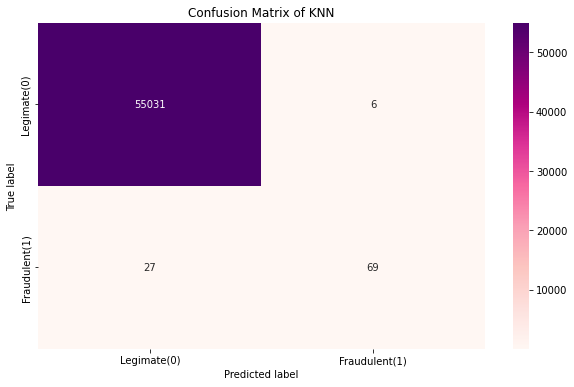

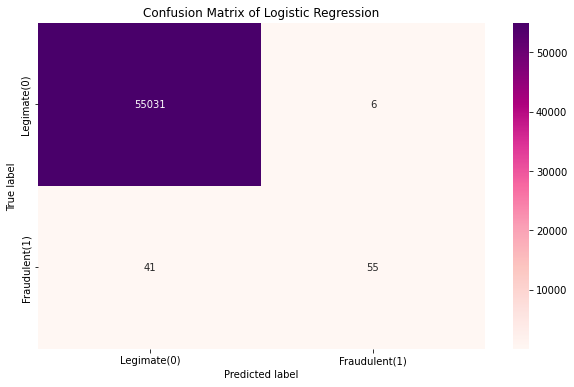

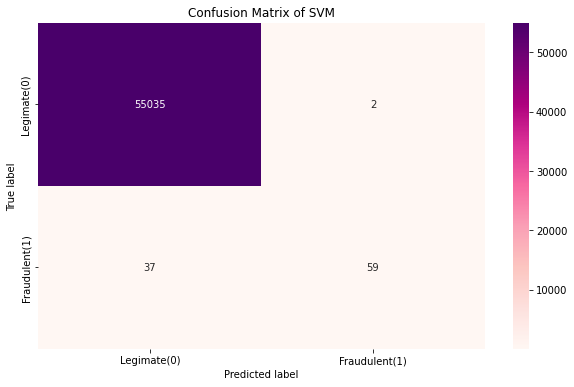

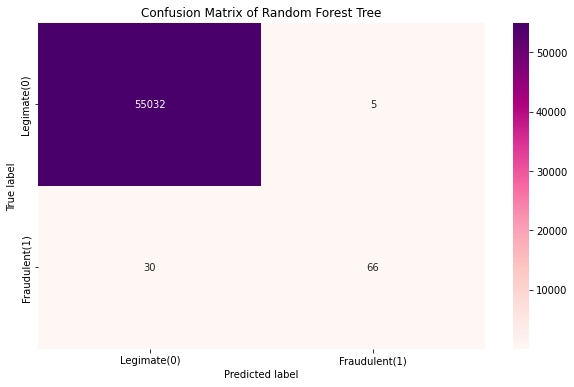

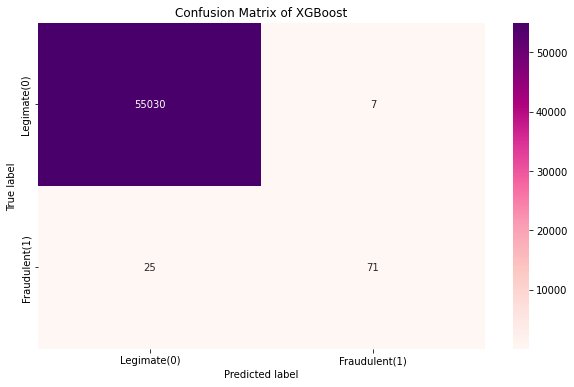

In [38]:
#1. decision tree

tree_cm_plot=plot_confusion_matrix(tree_matrix,title='Decision Tree')
plt.savefig('tree_cm_plot.png')
plt.show()

# 2. K-Nearest Neighbors

knn_cm_plot = plot_confusion_matrix(knn_matrix,title = 'KNN')
plt.savefig('knn_cm_plot.png')
plt.show()

# 3. Logistic regression

lr_cm_plot = plot_confusion_matrix(lr_matrix,title = 'Logistic Regression')
plt.savefig('lr_cm_plot.png')
plt.show()

# 4. Support Vector Machine

svm_cm_plot = plot_confusion_matrix(svm_matrix,title = 'SVM')
plt.savefig('svm_cm_plot.png')
plt.show()

# 5. Random forest tree

rf_cm_plot = plot_confusion_matrix(rf_matrix,title = 'Random Forest Tree')
plt.savefig('rf_cm_plot.png')
plt.show()

# 6. XGBoost

xgb_cm_plot = plot_confusion_matrix(xgb_matrix,title = 'XGBoost')
plt.savefig('xgb_cm_plot.png')
plt.show()

## The ROC Curve

c:\users\sohaib mallick\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
c:\users\sohaib mallick\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
c:\users\sohaib mallick\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarn

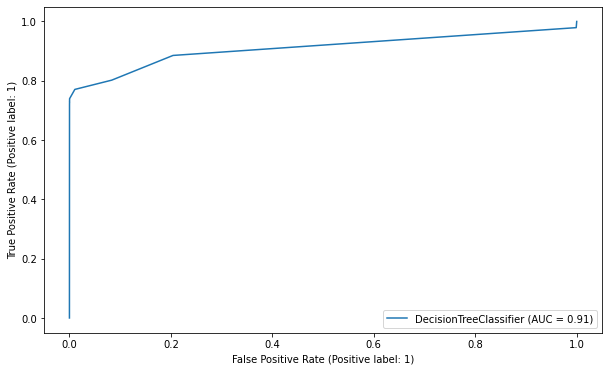

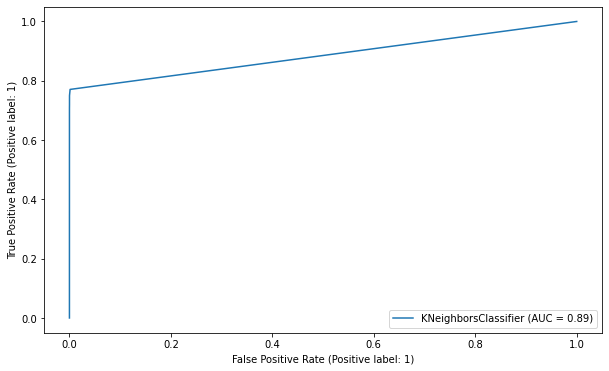

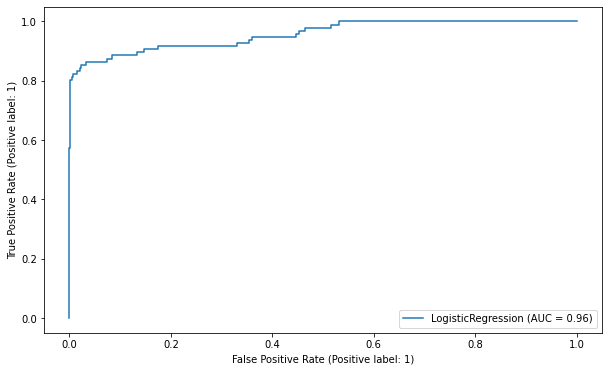

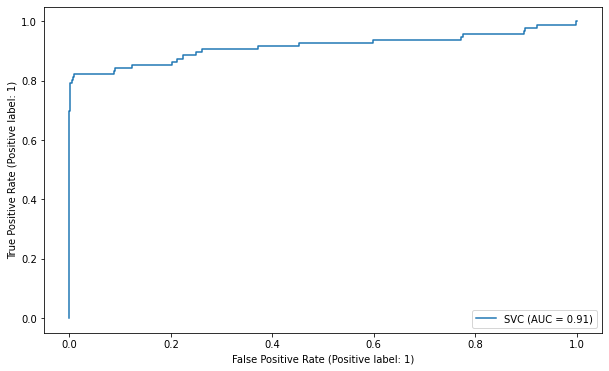

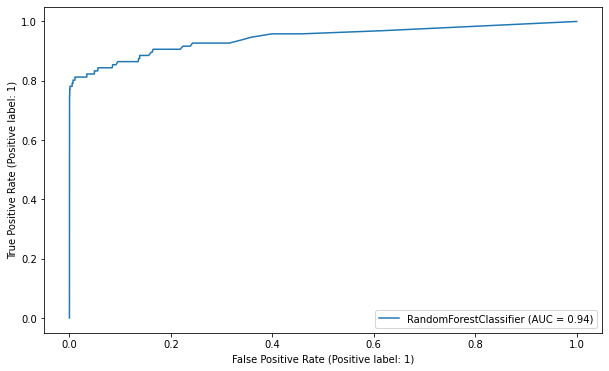

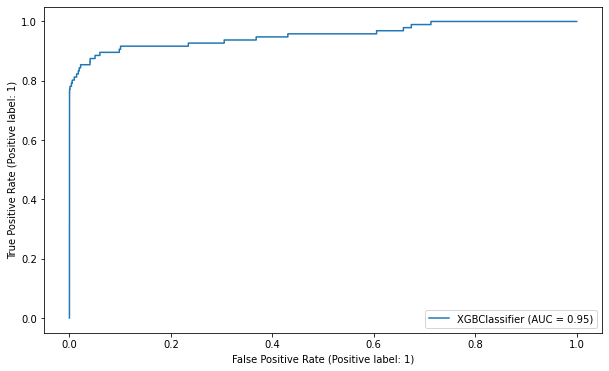

In [39]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(tree_model,X_test,y_test)
plot_roc_curve(knn,X_test,y_test)
plot_roc_curve(lr,X_test,y_test)
plot_roc_curve(svm,X_test,y_test)
plot_roc_curve(rf,X_test,y_test)
plot_roc_curve(xgb,X_test,y_test)

# Conclusion

The winner is … XGBoost Classifier

When we see the confusion matrix of XGBoost model correctly retrieved 55030 legimate out of 55037, 71 fraudulent out of 96 and hit the 99.94% accuracy,f1 score 0.81 which performed excellent as compare to other 5 model in our credit card fraud detection.

Successfully built six different types of classification models starting from the Decision tree model to the XGBoost model. After that, evaluated each of the models using the evaluation metrics and XGBoost model is most suitable for the given case.

With an unlimited and rising number of ways someone can commit fraud, detection can be difficult. As result, fraud is costing financial institutions billions of dollars each year. This problem is becoming a serious one that threatens the financial security of million of people. Organizations should implement of machine learning algorithms, look for fraud in financial transactions, locations, devices used, initiated sessions and authentication systems.


# Deployment

In [40]:
import pickle

In [41]:
model=xgb.fit(X_train,y_train)

In [42]:
filename="Credit_card_Fraud_detection.pkl"

In [43]:
fileobj=open(filename,'wb')

In [44]:
pickle.dump(model,fileobj)

In [45]:
fileobj.close()

In [46]:
#loaded_model=pickle.load(opne(filename,'rb')